# Final Project - Gibbs Sampling

### 1.

Let $p(x|y)=C_1ye^{-yx}, p(y|x)=C_2xe^{-xy}$, then because they are conditional distributions, so we can get that  
$\int_0^BC_1ye^{-yx}dx=1, \int_0^BC_2xe^{-xy}dy=1$  
$\Rightarrow C_1=\frac{1}{1-e^{-yB}}\ ,\ C_2=\frac{1}{1-e^{-xB}}$

So the CDF of these distributions are  
$F_X(x)=\int_0^x\frac{1}{1-e^{-yB}}ye^{-yu}du=\frac{1-e^{-yx}}{1-e^{-yB}}$  
Similar, we get  
$F_Y(y)=\frac{1-e^{-yx}}{1-e^{-xB}}$  
So the inverse of these CDF are:  
$F_X^{-1}(u)=-\frac{1}{y}log(1-u(1-e^{-yB}))$  
$F_Y^{-1}(u)=-\frac{1}{x}log(1-u(1-e^{-xB}))$

So in this case, we can change the example sampler like this:  
First, we will check if the input value is correct, both B and T should be larger than 0, T's type should be int, and B's type should be int of float.  
Then, we create a T*2 Numpy matrix as the output matrix, the first column is X, and the second column is Y. After that, we set the start value of x and y (They can't be 0 because they are the denominators). For each loop, we generate different u's from Unif[0,1] and use Inverse Transform Sampling, which inverse function of CDF is calculated before, to generate the samples from the conditional distribution. We also set thin=1000 so we can get the sample more correctly.  
Finally, we put the value of x and y in the output matrix. And we return the output matrix after the loop.  
The code is showed below

In [1]:
import numpy as np
import random,math
import matplotlib.pyplot as plt 

In [2]:
def gibbs(B=5.0,T=1000,thin=1000):
    if(type(B)==int):  #change the type of B to float
        B=float(B)
    if(type(T)!=int or type(B)!=float or type(thin)!=int):  #check if we input the correct type
        print("Wrong input type! B should be float(or int), T should be int, and thin should be int")
        return False
    if(T<0): #check if the input T is correct
        print("Wrong input! T should larger than 0")
        return False
    if(B<0): #check if the input B is correct
        print("Wrong input! B should larger than 0")
        return False
    output=np.zeros((T,2)) #create the output matrix T*2
    x=1 
    y=1
    # Set the start value of x and y
    for i in range(T): 
        for j in range(thin):
            u=random.uniform(0,1)
            x=-1/y*math.log(1-u*(1-math.exp(-y*B)))
            #u has to be sampled each time
            u=random.uniform(0,1)
            y=-1/x*math.log(1-u*(1-math.exp(-x*B)))
            # using Gibbs sampling to get the samples we need
        output[i,0]=x
        output[i,1]=y
        # save the value of x and y for each loop
    return output


Test for incorrect inputs:

In [3]:
gibbs(B='a',T=500)
gibbs(B=5.5,T=-100)
gibbs(B=-5,T=100)

Wrong input type! B should be float(or int), T should be int, and thin should be int
Wrong input! T should larger than 0
Wrong input! B should larger than 0


False

### 2. 
According to the problem, let's set B=5 and T=500, 5000, 50000 seperately, and we use plt functions to plot the histogram of the values of X.

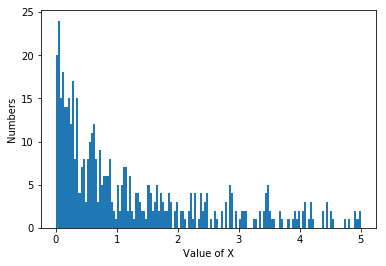

In [4]:
#get the sample of different sample size and plot the historgram of the values of x
output1=gibbs(B=5.0,T=500)
plt.hist(output1[:,0],150)
plt.xlabel("Value of X")
plt.ylabel("Numbers")
plt.show()

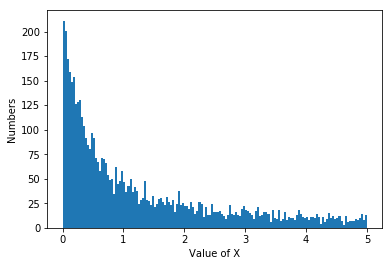

In [5]:
output2=gibbs(B=5.0,T=5000)
plt.hist(output2[:,0],150)
plt.xlabel("Value of X")
plt.ylabel("Numbers")
plt.show()

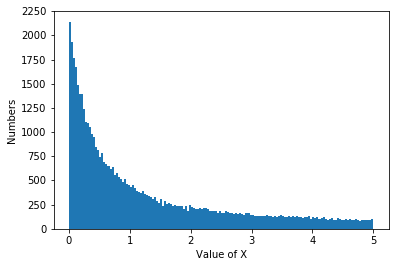

In [6]:
output3=gibbs(B=5.0,T=50000)
plt.hist(output3[:,0],150)
plt.xlabel("Value of X")
plt.ylabel("Numbers")
plt.show()

We can see that with the increase of sample size, the histogram of values of x will be more smooth and similar to the exponential distribution.

### 3.

According to the sampler, we know that $E_{p(x)}[X]=\int_0^B\int_0^B xf(x,y)dxdy=\int_0^B\int_0^B xf(x,y)dydx=\int_0^Bxf_X(x)dx$  
Because in the sampler we get discrete values, so according to the Method of moments (or the Law of Large Numbers):  
$E_{p(x)}(X)=\bar{x}=\frac{1}{T}\sum_{i=1}^Tx_i$  
So we can calculate the estimate of the expection of X with different sample sizes by calculate their means.

In [7]:
# compute the mean value of output matrix of different sample sizes, and according to the method of moments, 
#they are the estimates of the expectation of X
EX1=np.mean(output1[:,0])
EX2=np.mean(output2[:,0])
EX3=np.mean(output3[:,0])

So we can see that the estimates of the expectation of X by using the 500, 5000, and 50000 samples from the samplers are

In [8]:
print(EX1,",",EX2,"and",EX3)

1.21537633145 , 1.25841787811 and 1.27199120894


According to the x and y's conditional distribution, we should think that their marginal distribution should be symmetric and probably alike. Let's use the cumfreq function in the scipy package to check whether they have similar cdf. (To simplify, let's just use the samples we get when T=50000)

In [9]:
import scipy
from scipy import stats
from scipy.stats import cumfreq,ks_2samp

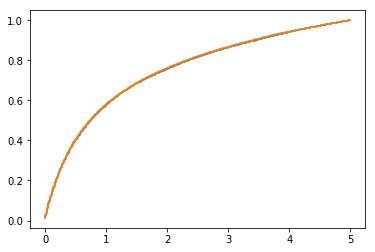

In [10]:
x=np.arange(0,5,.01)
out1=cumfreq(output3[:,0],numbins=len(x),defaultreallimits=[min(x),max(x)]).cumcount
out1/=max(out1)
plt.step(x,out1)
out2=cumfreq(output3[:,1],numbins=len(x),defaultreallimits=[min(x),max(x)]).cumcount
out2/=max(out2)
plt.step(x,out2)
plt.show()

This time we can finally see that the cdf of x and y are similar. So the code may be finally right.
Also, we can use the ks_2samp() function to check whether x and y's distribution are similar. (To simplify, let's just use the samples we get when T=50000)

In [11]:
ks_2samp(output3[:,0],output3[:,1])

Ks_2sampResult(statistic=0.0050399999999999889, pvalue=0.54821157586482783)

We can see that the p-value is larger than 0.05, so we can conclude that x and y's distribution are similar, so our code is correct.